#Libraries And Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
dt=pd.read_csv("/content/drive/MyDrive/IMDB/IMDB Dataset.csv")
dt

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#dt=pd.read_csv("/content/IMDB Dataset.csv.zip")
#dt

#Pre-Processing

In [ ]:
dt.shape

(50000, 2)

In [ ]:
df_positive = dt[dt['sentiment']=='positive']
df_negative = dt[dt['sentiment']=='negative']

df_positive

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [ ]:
dt.value_counts(['sentiment'])

sentiment
negative     25000
positive     25000
dtype: int64

In [ ]:
review=dt['review']
dup= dt[review.isin(review[review.duplicated()])].sort_values("review")
dup

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative
...,...,...
47876,this movie sucks. did anyone notice that the e...,negative
44122,"well, the writing was very sloppy, the directi...",negative
23056,"well, the writing was very sloppy, the directi...",negative
10163,"when I first heard about this movie, I noticed...",positive


In [ ]:
dt.drop_duplicates(inplace = True)
dt

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the Special Characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text=remove_special_characters(text)
    return text

#Apply function on review column
dt['review']=dt['review'].apply(denoise_text)
dt

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
dt['review']=dt['review'].apply(simple_stemmer)

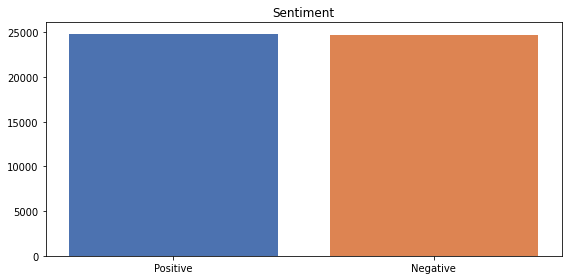

In [ ]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive','Negative'],height=dt.value_counts(['sentiment']),color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [ ]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
tokenizer=ToktokTokenizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
    
#Apply function on review column
dt['review']=dt['review'].apply(remove_stopwords)

{'are', 'but', 'here', "shouldn't", 'some', 'we', "aren't", 'then', 'against', 'after', 'same', 'hers', 'which', 'once', 'don', 's', 'myself', 'his', "mightn't", 'me', 'own', 't', "couldn't", 'them', 'above', 'until', 'before', 'out', 'a', 'yourself', 'on', 'few', "it's", 'my', 're', 'him', "you've", 'am', 'their', 'this', 'o', 'if', 'that', 'each', 'yours', 'mightn', 'shan', "don't", 'from', 'when', 'with', 'd', 'an', "wouldn't", "that'll", 'can', "hadn't", 'does', "won't", 'what', 'couldn', 'you', 'its', 'shouldn', 'being', 'or', 'needn', 'himself', 'it', 'about', 'into', 'aren', 'not', 'very', "should've", 'm', 'who', "isn't", 'herself', 'he', 'further', "doesn't", 'through', 'only', 'weren', 'itself', "mustn't", "needn't", "shan't", 'under', 'our', 'just', 'of', 'over', "hasn't", 'off', 'should', "didn't", "you'll", 'yourselves', 'because', "weren't", 'mustn', 'all', 'haven', "haven't", 'been', 'no', 'other', 'nor', "you'd", 'your', 'the', 'hasn', 'y', 'didn', 'has', 'her', 'she', 

In [ ]:
dtcp = dt.copy()

In [ ]:
dt.sentiment = [ 1 if each == "positive" else 0 for each in dt.sentiment]
dt.value_counts(['sentiment'])

sentiment
1            24884
0            24698
dtype: int64

In [ ]:
y=dt.drop('review',axis=1)

In [ ]:
X=dt.drop(['sentiment'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train.shape)
print(X_test.shape)

(39665, 1)
(9917, 1)


In [ ]:
sns.set_style("whitegrid")

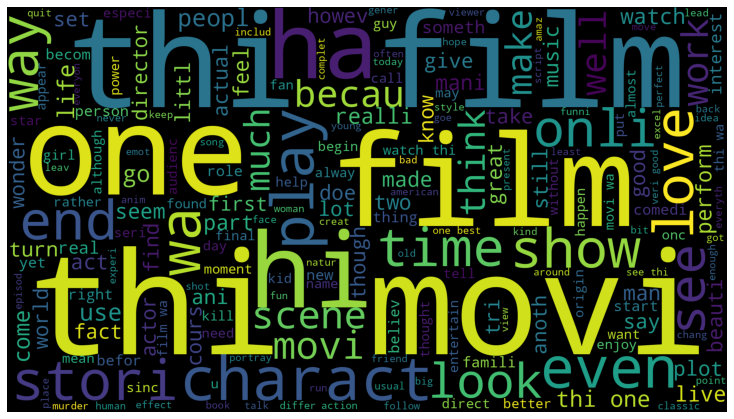

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(dt[dt.sentiment==1].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

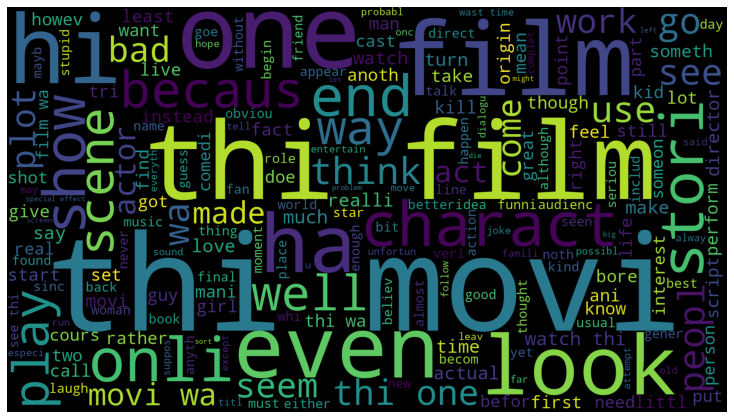

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(dt[dt.sentiment==0].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Analysing Words

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(dt.review)
corpus[:10]

['one',
 'review',
 'ha',
 'mention',
 'watch',
 '1',
 'oz',
 'episod',
 'youll',
 'hook']

In [ ]:
#Most Common
from collections import Counter
counter = Counter(corpus)
mc = counter.most_common(20)
mc = dict(mc)
mc

{'thi': 144309,
 'movi': 98189,
 'wa': 94411,
 'film': 91431,
 'hi': 56961,
 'one': 52251,
 'like': 43458,
 'ha': 32910,
 'time': 29551,
 'good': 28699,
 'make': 28376,
 'get': 27497,
 'charact': 27338,
 'see': 27332,
 'veri': 27292,
 'watch': 26807,
 'even': 24539,
 'stori': 24059,
 'would': 23801,
 'onli': 22814}

#ML Algorithms

In [ ]:
train, test= train_test_split(dt, test_size=0.2, random_state=42)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_X_vector = tfidf.fit_transform(X_train)
# also fit the test_x_vector
test_x_vector = tfidf.transform(X_test)

In [ ]:
count_vect = CountVectorizer() # CountVectorizer
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

##Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(train_X_vector,y_train)

LogisticRegression()

In [ ]:
lrpred=lr.predict(test_x_vector)
lrscore = accuracy_score(y_test, lrpred)

print("LR Accuracy: ", round((100*lrscore),2),"%")


print("\n\n........................CLASSIFICATION MATRIX.....................")
print(classification_report(lrpred,y_test))

LR Accuracy:  88.49 %


........................CLASSIFICATION MATRIX.....................
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4780
           1       0.90      0.87      0.89      5137

    accuracy                           0.88      9917
   macro avg       0.88      0.89      0.88      9917
weighted avg       0.89      0.88      0.88      9917



##SVM

In [ ]:
svc = LinearSVC(penalty='l2',loss='hinge')
svc.fit(train_X_vector, y_train)

LinearSVC(loss='hinge')

In [ ]:
svcpred= svc.predict(test_x_vector)
svcscore = accuracy_score(y_test, svcpred)
print("SVC Accuracy: ", round((100*svcscore),2),"%")

print("\n\n........................CLASSIFICATION MATRIX.....................")
print(classification_report(svcpred,y_test))

SVC Accuracy:  88.86 %


........................CLASSIFICATION MATRIX.....................
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4794
           1       0.90      0.88      0.89      5123

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



##XG Boost

In [ ]:
xgb = XGBClassifier()
xgb.fit(train_X_vector, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgbpred = xgb.predict(test_x_vector)
xgbscore = accuracy_score(y_test,xgbpred)

print("XGB Accuracy: ", round((100*xgbscore),2),"%")

print("\n\n........................CLASSIFICATION MATRIX.....................")
print(classification_report(svcpred,y_test))

XGB Accuracy:  85.02 %


........................CLASSIFICATION MATRIX.....................
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4794
           1       0.90      0.88      0.89      5123

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



Word2Vector

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Train and download Word2Vec vectors
sentences = [review.split() for review in dt['review']]

model = Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
model.save('word2vec.model')
# Convert each word to vector and represent the sentence in vector form using the word embeddings
def sentence_vector(sentence,model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.vocab]
    if len(word_vectors) == 0:
        return np.zeros((100,))
    return np.mean(word_vectors, axis=0)
# Convert each sentence in the dataset to a vector using the Word2Vec model
word2vec_train = np.array([sentence_vector(sentence, model) for sentence in dt['review']])
word2vec_test = np.array(dt['sentiment'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_train, word2vec_test, test_size=0.2, random_state=56)

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
y_predlr= lr2.predict(X_test)
acc = accuracy_score(y_test, y_predlr)
print('Accuracy:', acc)

print("\n\n........................CLASSIFICATION MATRIX.....................")
print(classification_report(y_predlr,y_test))

Accuracy: 0.8564081879600686


........................CLASSIFICATION MATRIX.....................
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4824
           1       0.87      0.85      0.86      5093

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [ ]:
svc = LinearSVC(penalty='l2',loss='hinge')
svc.fit(X_train, y_train)

LinearSVC(loss='hinge')

In [ ]:
y_predsv = svc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_predsv)

# print accuracy score
print("Accuracy:", accuracy)

print("\n\n........................CLASSIFICATION MATRIX.....................")
print(classification_report(y_predsv,y_test))

Accuracy: 0.855399818493496


........................CLASSIFICATION MATRIX.....................
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4838
           1       0.86      0.85      0.86      5079

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_predxg = xgb.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_predxg)

# print accuracy score
print("Accuracy:", accuracy)

print("\n\n........................CLASSIFICATION MATRIX.....................")
print(classification_report(y_predxg,y_test))

Accuracy: 0.8436018957345972


........................CLASSIFICATION MATRIX.....................
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4837
           1       0.85      0.84      0.85      5080

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917

